<a href="https://colab.research.google.com/github/shahabbadihi/IT/blob/master/colabrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import io

In [111]:

# file_url = "https://raw.githubusercontent.com/shahabbadihi/IT/master/PreprocessedDataset.csv"

file_url = "https://raw.githubusercontent.com/shahabbadihi/IT/master/SentimentDataset.csv"
response = requests.get(file_url)

dest = 'local-file.csv'

with open(dest, "wb") as filee:
  filee.write(response.content)

df = pd.read_csv(dest)
df.head(10)

,Unnamed: 0,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,cart_id,comment_sentiment
0,0,559850,خاک و کود تی تی بسته 10 کیلوگرمی,TC,466132,2,0,verified,not_recommended,خاک عاری از مواد مقوی,اصلا خاک خوبی نبود. کلی سنگ های درشت داشت و اص...,"[""ندارد""]","[""پر از سنگ ریزه ""]",1,1
1,1,112946,توستر فلر مدل TO 220,HA,466139,2,0,verified,not_recommended,خراب شدن اهرم پایین برنده,بعد از دو و نیم سال استفاده، اهرم پایین دهنده ...,"[""زیبایی، سبکی و اندازه مناسب توستر""]","[""خراب شدن اهرم پایین برنده""]",2,1
2,2,607671,هدست واقعیت مجازی ایکس پی پروداکت مدل VR BOX,AC,466160,1,2,verified,no_idea,قیمت پایین فدای کیفیت .....,کیفیت لنزش پایینه شرکت فروشنده گارانتی تعویض ن...,"[""ارزون""]","[""کیفیت پایین لنز""]",3,0
3,3,757892,کیف پول زنانه آیسا مدل KZP-1,FA,466160,1,0,verified,not_recommended,کیفیت ساخت پایین,اصلا با قیمت فروش ویژه هم ارزش خرید نداره_x000...,NaN,"[""کیفیت ساخت پایین\r"",""چسب کاری داخل و بیرون""]",3,1
4,4,601446,اسپیکر قابل حمل مدل ip085 مناسب برای آیفون و ...,IT,466160,2,2,verified,no_idea,بدرد ساختن اسپیکر پرتابل میخوره,دوستان من این مدل برای ساخت اسپیکر پرتابل گرفت...,"[""کیفیت قابل قبول برد و آمپیلی فایر داخلی\r"",""...","[""نداشتن بلوتوث""]",4,1
5,5,174874,دسته بازی بلوتوث شیاومی مدل MDZ-11-AA,AV,466160,0,0,verified,\N,بهترین گیم پد موجود,بهترین گیم پدی که استفاده کردم_x000D_\nتو خرید...,"[""ارگونومی ps4\r"",""چینش xBOX360\r"",""کیفیت ساخت...","[""شارژی نبودن\r"",""نیاز به برنامه برای اتصال به...",4,1
6,6,694521,تیله شیشه ای کیان مدل پنج پر بسته 20 عددی,TS,466168,0,0,verified,not_recommended,پشیمان از خرید,فکر میکردم بزرتر از این باشد و شفافتر ولی کئچک...,NaN,"[""عدم تشابه عکس با واقعیت""]",7,1
7,7,593146,کفش راحتی زنانه مل اند موژ مدل W-1102-1,FA,466314,6,3,verified,recommended,واقعا می ارزه من راضیم,تو تخفیف خریدش می ارزه,NaN,NaN,8,1
8,8,117324,کیف دستی چرم طبیعی گالری چیستا طرح اسلیمی,MA,466314,1,0,verified,recommended,کیف خوبیه,سلام من این کیفو واسه خانومم خریدم همه چیزش خو...,NaN,NaN,8,1
9,9,300411,کفش راحتی مردانه ژرمن مدل k.na.761,FA,466315,0,0,verified,\N,عدم وجود سایز بزرگتر,متاسفانه فقط سایز کوچک موجود است!,"[""عالی وزیبا""]","[""سایز کوچک""]",10,1


In [112]:
# preprocess for convert recommend to number
# recommended no_idea not_recommended \N
df.loc[df['recommend'] == 'recommended', 'recommend'] = 2
df.loc[df['recommend'] == 'not_recommended', 'recommend'] = 0
df.loc[df['recommend'] == 'no_idea', 'recommend'] = 1
df.loc[df['recommend'] == '\\N', 'recommend'] = 1
df.head(10)

,Unnamed: 0,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,cart_id,comment_sentiment
0,0,559850,خاک و کود تی تی بسته 10 کیلوگرمی,TC,466132,2,0,verified,0,خاک عاری از مواد مقوی,اصلا خاک خوبی نبود. کلی سنگ های درشت داشت و اص...,"[""ندارد""]","[""پر از سنگ ریزه ""]",1,1
1,1,112946,توستر فلر مدل TO 220,HA,466139,2,0,verified,0,خراب شدن اهرم پایین برنده,بعد از دو و نیم سال استفاده، اهرم پایین دهنده ...,"[""زیبایی، سبکی و اندازه مناسب توستر""]","[""خراب شدن اهرم پایین برنده""]",2,1
2,2,607671,هدست واقعیت مجازی ایکس پی پروداکت مدل VR BOX,AC,466160,1,2,verified,1,قیمت پایین فدای کیفیت .....,کیفیت لنزش پایینه شرکت فروشنده گارانتی تعویض ن...,"[""ارزون""]","[""کیفیت پایین لنز""]",3,0
3,3,757892,کیف پول زنانه آیسا مدل KZP-1,FA,466160,1,0,verified,0,کیفیت ساخت پایین,اصلا با قیمت فروش ویژه هم ارزش خرید نداره_x000...,NaN,"[""کیفیت ساخت پایین\r"",""چسب کاری داخل و بیرون""]",3,1
4,4,601446,اسپیکر قابل حمل مدل ip085 مناسب برای آیفون و ...,IT,466160,2,2,verified,1,بدرد ساختن اسپیکر پرتابل میخوره,دوستان من این مدل برای ساخت اسپیکر پرتابل گرفت...,"[""کیفیت قابل قبول برد و آمپیلی فایر داخلی\r"",""...","[""نداشتن بلوتوث""]",4,1
5,5,174874,دسته بازی بلوتوث شیاومی مدل MDZ-11-AA,AV,466160,0,0,verified,1,بهترین گیم پد موجود,بهترین گیم پدی که استفاده کردم_x000D_\nتو خرید...,"[""ارگونومی ps4\r"",""چینش xBOX360\r"",""کیفیت ساخت...","[""شارژی نبودن\r"",""نیاز به برنامه برای اتصال به...",4,1
6,6,694521,تیله شیشه ای کیان مدل پنج پر بسته 20 عددی,TS,466168,0,0,verified,0,پشیمان از خرید,فکر میکردم بزرتر از این باشد و شفافتر ولی کئچک...,NaN,"[""عدم تشابه عکس با واقعیت""]",7,1
7,7,593146,کفش راحتی زنانه مل اند موژ مدل W-1102-1,FA,466314,6,3,verified,2,واقعا می ارزه من راضیم,تو تخفیف خریدش می ارزه,NaN,NaN,8,1
8,8,117324,کیف دستی چرم طبیعی گالری چیستا طرح اسلیمی,MA,466314,1,0,verified,2,کیف خوبیه,سلام من این کیفو واسه خانومم خریدم همه چیزش خو...,NaN,NaN,8,1
9,9,300411,کفش راحتی مردانه ژرمن مدل k.na.761,FA,466315,0,0,verified,1,عدم وجود سایز بزرگتر,متاسفانه فقط سایز کوچک موجود است!,"[""عالی وزیبا""]","[""سایز کوچک""]",10,1


### KNN Classifier

In [114]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots()
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

#### for recommend

0.40646666666666664


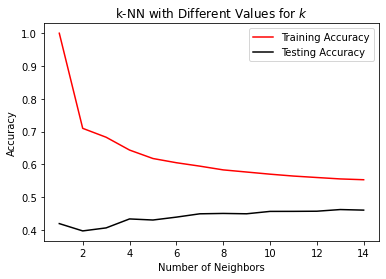

In [118]:
# Create features and target
X = df[['product_id', 'user_id', 'cart_id']]
# X = df.select_dtypes(exclude='object')
y = df.recommend

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Initialize a model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit and predict
y_train=y_train.astype('int')
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print(accuracy_score(list(y_test.values), predictions))

# Create possible values for k
neighbors = np.arange(1, 15)

plot_complexity_curve(neighbors, KNeighborsClassifier, X_train, X_test, y_train, list(y_test.values))

#### for comment sentiment

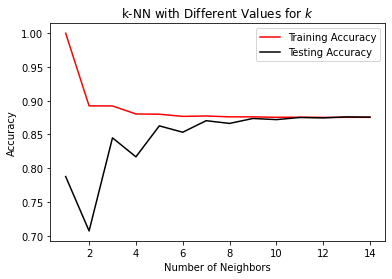

In [115]:
# Create features and target
X = df[['product_id', 'user_id', 'cart_id']]
# X = df.select_dtypes(exclude='object')
y = df.comment_sentiment

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Initialize a model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit and predict
y_train=y_train.astype('int')
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print(accuracy_score(list(y_test.values), predictions))


# Create possible values for k
neighbors = np.arange(1, 15)

plot_complexity_curve(neighbors, KNeighborsClassifier, X_train, X_test, y_train, y_test)

### KNN Regressor

In [105]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
# Create features and target
# X = df.select_dtypes(exclude=['object'])
X = df[['product_id', 'user_id']]
y = df.recommend

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=200)

# Fit and score
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

ValueError: ignored